In [1]:
import pandas as pd
import numpy as np
import copy
from features_creation import *
import seaborn as sn
from matplotlib import pyplot as plt

In [2]:
def percentage_of_positives(group):
    true_positives = group[(group.ContrabandIndicator == True)].shape[0]
    n_vehicles_stopped = group.shape[0]
    return 100*true_positives/n_vehicles_stopped

In [3]:
def percentage_of_false_positives(group, threshold=0):
    false_positives = group[(group.VehicleSearchedIndicator == True) & (group.ContrabandIndicator == False)].shape[0]
    n_vehicle_searched = group[(group.VehicleSearchedIndicator == True)].shape[0] 
    if n_vehicle_searched > threshold:
        return 100*false_positives/n_vehicle_searched
    else:
        return None

In [4]:
def precision(group, threshold=0):
    true_positives = group[(group.VehicleSearchedIndicator == True) & (group.ContrabandIndicator == True)].shape[0]
    n_vehicle_searched = group[(group.VehicleSearchedIndicator == True)].shape[0] 
    if n_vehicle_searched > threshold:
        precision = 100*true_positives/n_vehicle_searched
        return precision
    else:
        return None

## Dataset Summary

In [5]:
df_train = pd.read_csv("resources/train.csv")

In [6]:
file_summary = "resources/dataset_summary.text"
file = open(file_summary, 'w')
new_line = "\n#####################################################################"

In [7]:
df_train.head()

,VehicleSearchedIndicator,ContrabandIndicator,Department Name,InterventionDateTime,InterventionLocationName,InterventionReasonCode,ReportingOfficerIdentificationID,ResidentIndicator,SearchAuthorizationCode,StatuteReason,SubjectAge,SubjectEthnicityCode,SubjectRaceCode,SubjectSexCode,TownResidentIndicator
0,False,False,New Haven,10/01/2013 12:00:00 AM,NEW HAVEN,V,262,True,N,Stop Sign,31.0,H,W,M,True
1,False,False,State Police,10/01/2013 12:00:00 AM,WILLINGTON,V,1000002715,False,N,Other,29.0,M,W,M,False
2,False,False,Plymouth,10/01/2013 12:00:00 AM,Terryville,V,21,True,N,Speed Related,18.0,N,W,M,True
3,False,False,Plymouth,10/01/2013 12:00:00 AM,Plymouth,V,D1,True,N,Speed Related,52.0,N,W,F,False
4,False,False,Bethel,10/01/2013 12:00:00 AM,BETHEL,V,08M,True,N,Cell Phone,34.0,N,W,M,False


In [8]:
df_train.shape

(2473643, 15)

In [9]:
#updating summary with this information
n_records = df_train.shape[0]
n_columns = df_train.shape[1]
summary = "Number of records: " + str(n_records) + new_line
summary += "\nNumber of columns: " + str(n_columns) + new_line

In [10]:
#column names
column_names = df_train.columns.values
column_names

array(['VehicleSearchedIndicator', 'ContrabandIndicator',
       'Department Name', 'InterventionDateTime',
       'InterventionLocationName', 'InterventionReasonCode',
       'ReportingOfficerIdentificationID', 'ResidentIndicator',
       'SearchAuthorizationCode', 'StatuteReason', 'SubjectAge',
       'SubjectEthnicityCode', 'SubjectRaceCode', 'SubjectSexCode',
       'TownResidentIndicator'], dtype=object)

In [11]:
#updating summary with this information
summary += "\nColumns names: " + str(column_names) + new_line

In [12]:
#column types
column_types = df_train.dtypes
column_types

VehicleSearchedIndicator               bool
ContrabandIndicator                    bool
Department Name                      object
InterventionDateTime                 object
InterventionLocationName             object
InterventionReasonCode               object
ReportingOfficerIdentificationID     object
ResidentIndicator                      bool
SearchAuthorizationCode              object
StatuteReason                        object
SubjectAge                          float64
SubjectEthnicityCode                 object
SubjectRaceCode                      object
SubjectSexCode                       object
TownResidentIndicator                  bool
dtype: object

In [13]:
#updating summary with this information
summary += "\nColumn types: " + str(column_types) + new_line

### Nulls

In [14]:
#number of nulls for each column
n_nulls = "\nNumber of nulls that each column has:"
for i in df_train.columns:
    n_nulls += "\n\t" + str(i) + ": " + str(len(pd.isna(df_train[i])[pd.isna(df_train[i])==True]))
print(n_nulls)


Number of nulls that each column has:
	VehicleSearchedIndicator: 0
	ContrabandIndicator: 0
	Department Name: 0
	InterventionDateTime: 0
	InterventionLocationName: 36
	InterventionReasonCode: 2
	ReportingOfficerIdentificationID: 2
	ResidentIndicator: 0
	SearchAuthorizationCode: 10
	StatuteReason: 507
	SubjectAge: 0
	SubjectEthnicityCode: 0
	SubjectRaceCode: 0
	SubjectSexCode: 0
	TownResidentIndicator: 0


In [15]:
#updating summary with this information
summary += n_nulls + new_line

### Dulicates 

In [16]:
duplicates = df_train.duplicated()
n_duplicated_records = len(duplicates[duplicates==True])
n_duplicated_records

204756

In [17]:
#updating summary with this information
summary +=  "\nNumber of duplicated records: " + str(n_duplicated_records) + new_line

In [18]:
#drop duplicates
df_train = df_train[duplicates==False]

In [19]:
df_train.shape

(2268887, 15)

In [20]:
n_unique_records = df_train.shape[0]
n_unique_records

2268887

In [21]:
#updating summary with this information
summary +=  "\nNumber of unique records: " + str(n_unique_records) + new_line

## Variables Analysis

In [22]:
summary += "\n\n\t\t\tVariables Analysis" + new_line

### VehicleSearchedIndicator	

In [23]:
# if the vehicle was searched or not
n_VehicleSearchedIndicator = df_train["VehicleSearchedIndicator"].value_counts()
n_VehicleSearchedIndicator

False    2199008
True       69879
Name: VehicleSearchedIndicator, dtype: int64

In [24]:
summary +=  "\n" + str(n_VehicleSearchedIndicator) + new_line

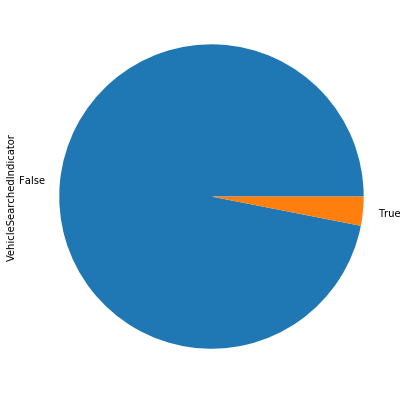

In [25]:
df_train.VehicleSearchedIndicator.value_counts().plot.pie(y="VehicleSearchedIndicator", figsize=(7, 7))

### ContrabandIndicator

In [26]:
#if the polices found contraband or not; This feature is our target; This is an imbalaced dataset
n_ContrabandIndicator = df_train["ContrabandIndicator"].value_counts()
n_ContrabandIndicator

False    2243241
True       25646
Name: ContrabandIndicator, dtype: int64

In [27]:
summary +=  "\n" + str(n_ContrabandIndicator) + new_line

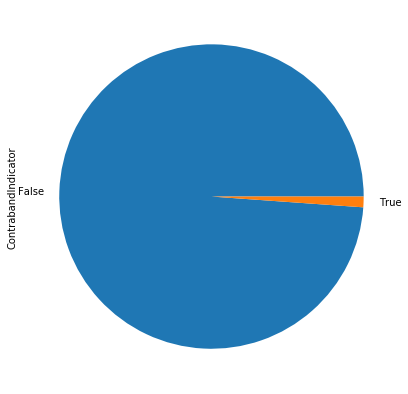

In [28]:
df_train.ContrabandIndicator.value_counts().plot.pie(y="Contraband Indicator", figsize=(7, 7))

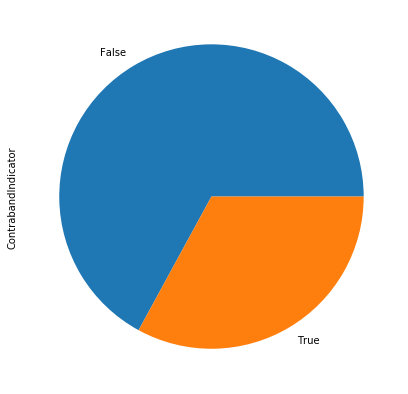

In [29]:
df_train[df_train["VehicleSearchedIndicator"]==True].ContrabandIndicator.value_counts().plot.pie(y="Contraband Indicator", figsize=(7, 7))

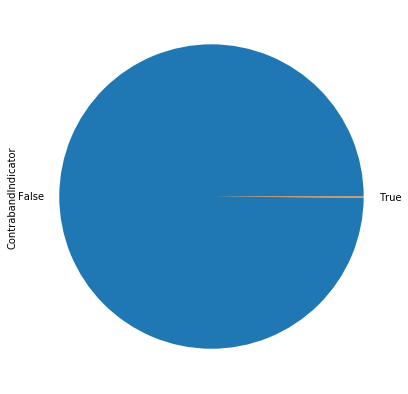

In [30]:
df_train[df_train["VehicleSearchedIndicator"]==False].ContrabandIndicator.value_counts().plot.pie(y="Contraband Indicator", figsize=(7, 7))

### Department Name

In [31]:
#This feature can be a source of bias

In [32]:
n_department_name = df_train["Department Name"].value_counts()
n_department_name

State Police                320343
New Haven                    64399
CSP Troop C                  53626
CSP Troop F                  48550
CSP Troop A                  45983
                             ...  
MTA                             71
Mashantucket Pequot             40
MET DIST WATER AUTHORITY         9
Mohegan Tribal                   5
Mohegan Tribal Police            4
Name: Department Name, Length: 122, dtype: int64

In [33]:
unique_dn = np.sort(df_train["Department Name"].unique())
unique_dn

array(['Ansonia', 'Avon', 'Berlin', 'Bethel', 'Bloomfield', 'Branford',
       'Bridgeport', 'Bristol', 'Brookfield', 'CAPITOL POLICE', 'CCSU',
       'CSP Headquarters', 'CSP Troop A', 'CSP Troop B', 'CSP Troop C',
       'CSP Troop D', 'CSP Troop E', 'CSP Troop F', 'CSP Troop G',
       'CSP Troop H', 'CSP Troop I', 'CSP Troop K', 'CSP Troop L',
       'Canton', 'Cheshire', 'Clinton', 'Coventry', 'Cromwell', 'DMV',
       'Danbury', 'Darien', 'Derby', 'ECSU', 'East Hampton',
       'East Hartford', 'East Haven', 'East Lyme', 'East Windsor',
       'Easton', 'Enfield', 'Fairfield', 'Farmington', 'Glastonbury',
       'Granby', 'Greenwich', 'Groton City', 'Groton Long Point',
       'Groton Town', 'Guilford', 'Hamden', 'Hartford', 'Ledyard',
       'MET DIST WATER AUTHORITY', 'MTA', 'MTA Stamford', 'Madison',
       'Manchester', 'Mashantucket Pequot', 'Mashantucket Pequot Police',
       'Meriden', 'Middlebury', 'Middletown', 'Milford', 'Mohegan Tribal',
       'Mohegan Tribal Police'

In [34]:
summary +=  "\nDepartment name: \n\t Unique values" + str(unique_dn) + ", Number of unique values: " + str(len(unique_dn))+ new_line

In [35]:
#we have police departments finishing with police and other that don't
#finish with that work but probably it is about the same department

In [36]:
clean_text = CleanText("Department Name")

In [37]:
df_train = clean_text.fit_transform(df_train)

In [38]:
df_train["Department Name"].value_counts()

state                    320343
newhaven                  64399
csptroopc                 53626
csptroopf                 48550
csptroopa                 45983
                          ...  
mtastamford                 241
wcsu                         88
mta                          71
metdistwaterauthority         9
mohegantribal                 9
Name: Department Name, Length: 120, dtype: int64

In [39]:
np.sort(df_train["Department Name"].unique())

array(['ansonia', 'avon', 'berlin', 'bethel', 'bloomfield', 'branford',
       'bridgeport', 'bristol', 'brookfield', 'canton', 'capitol', 'ccsu',
       'cheshire', 'clinton', 'coventry', 'cromwell', 'cspheadquarters',
       'csptroopa', 'csptroopb', 'csptroopc', 'csptroopd', 'csptroope',
       'csptroopf', 'csptroopg', 'csptrooph', 'csptroopi', 'csptroopk',
       'csptroopl', 'danbury', 'darien', 'derby', 'dmv', 'easthampton',
       'easthartford', 'easthaven', 'eastlyme', 'easton', 'eastwindsor',
       'ecsu', 'enfield', 'fairfield', 'farmington', 'glastonbury',
       'granby', 'greenwich', 'grotoncity', 'grotonlongpoint',
       'grotontown', 'guilford', 'hamden', 'hartford', 'ledyard',
       'madison', 'manchester', 'mashantucketpequot', 'meriden',
       'metdistwaterauthority', 'middlebury', 'middletown', 'milford',
       'mohegantribal', 'monroe', 'mta', 'mtastamford', 'naugatuck',
       'newbritain', 'newcanaan', 'newhaven', 'newington', 'newlondon',
       'newmilfor

### InterventionDateTime

In [40]:
n_InterventionDateTime = df_train["InterventionDateTime"].value_counts()
n_InterventionDateTime

03/07/2014 12:00:00 AM    269
03/08/2014 12:00:00 AM    266
03/17/2014 12:00:00 AM    260
03/21/2014 12:00:00 AM    252
03/22/2014 12:00:00 AM    250
                         ... 
12/06/2015 07:49:09 AM      1
09/13/2016 09:24:26 AM      1
08/13/2016 11:22:21 AM      1
10/11/2015 09:33:27 AM      1
03/01/2016 11:21:00 PM      1
Name: InterventionDateTime, Length: 1450465, dtype: int64

In [41]:
summary +=  "\n Top 5 values for time:\n" + str(n_InterventionDateTime.head()) + new_line

In [42]:
#this feature need some cleaning

In [43]:
time_features = TimeFeatures("InterventionDateTime")

In [44]:
df_train["InterventionDateTime"] = df_train["InterventionDateTime"].apply(time_features.clean_timestamp)
df_train["InterventionDateTime"] = df_train["InterventionDateTime"].apply(lambda x: pd.to_datetime(x, format="%m/%d/%Y %H:%M:%S"))
df_train = time_features.create_features(df_train)

In [45]:
df_train[["InterventionDateTime", "weekday", "hour", "month"]].head()

,InterventionDateTime,weekday,hour,month
0,2013-10-01,1,0,10
1,2013-10-01,1,0,10
2,2013-10-01,1,0,10
3,2013-10-01,1,0,10
4,2013-10-01,1,0,10


In [46]:
min(df_train.InterventionDateTime)

Timestamp('2013-10-01 00:00:00')

In [47]:
max(df_train.InterventionDateTime)

Timestamp('2018-05-16 02:02:00')

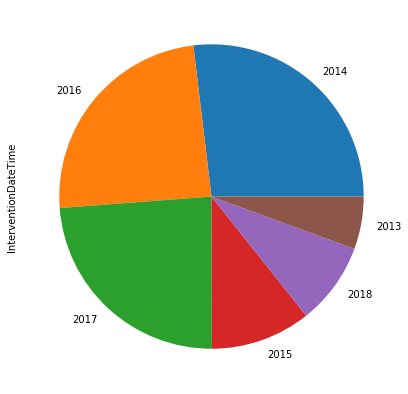

In [48]:
df_train.InterventionDateTime.dt.year.value_counts().plot.pie(figsize=(7, 7))

In [49]:
df_train.groupby("weekday").apply(percentage_of_positives)

weekday
0    1.018946
1    1.055806
2    1.037778
3    1.080983
4    1.204205
5    1.300366
6    1.236021
dtype: float64

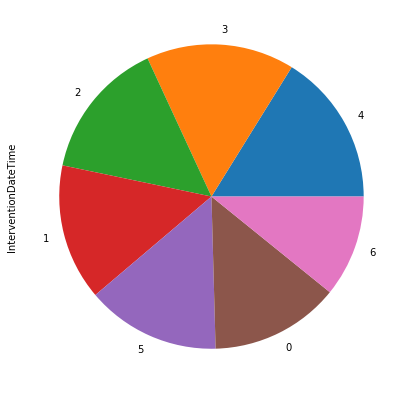

In [50]:
df_train.InterventionDateTime.dt.weekday.value_counts().plot.pie(figsize=(7, 7))

In [51]:
df_train.groupby("month").apply(percentage_of_positives)

month
1     1.333623
2     1.300940
3     1.280365
4     1.047170
5     1.052251
6     1.045035
7     0.969460
8     0.921490
9     1.010911
10    1.094201
11    1.107019
12    1.242769
dtype: float64

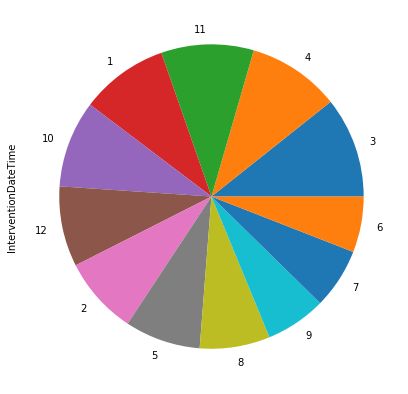

In [52]:
df_train.InterventionDateTime.dt.month.value_counts().plot.pie(figsize=(7, 7))

In [53]:
df_train.groupby("hour").apply(percentage_of_positives).sort_values(ascending=False)

hour
2     2.305946
3     2.025783
1     1.996920
22    1.848334
21    1.751788
0     1.728128
20    1.541997
19    1.479377
23    1.337973
18    1.308389
17    1.132096
4     1.085719
14    0.969818
16    0.965984
15    0.937610
12    0.918179
13    0.847162
11    0.768341
10    0.669803
9     0.517799
5     0.418529
8     0.317741
7     0.274607
6     0.247785
dtype: float64

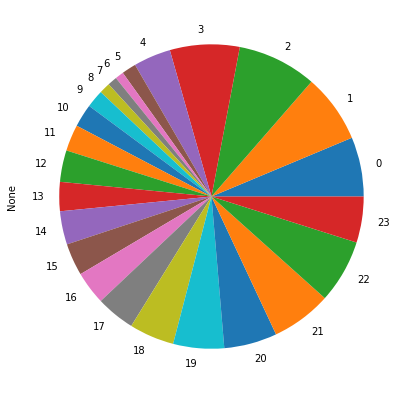

In [54]:
df_train.groupby("hour").apply(percentage_of_positives).plot.pie(figsize=(7, 7))

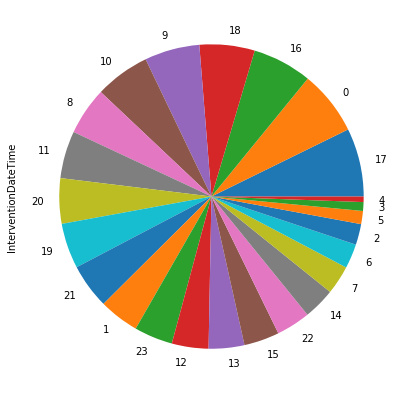

In [55]:
df_train.InterventionDateTime.dt.hour.value_counts().plot.pie(figsize=(7, 7))

### InterventionLocationName

In [56]:
n_InterventionLocationName = df_train["InterventionLocationName"].value_counts()
n_InterventionLocationName

NEW HAVEN               73451
WALLINGFORD             41251
Manchester              33862
WESTPORT                30560
Enfield                 29980
                        ...  
East Main Street @ R        1
345                         1
east main and columb        1
E Main St @ Hartford        1
High Street @ Culver        1
Name: InterventionLocationName, Length: 2504, dtype: int64

In [57]:
summary +=  "\nNumber unique values for InterventionLocationName before lower case and spaces removing: " + str(len(n_InterventionLocationName)) + new_line

In [58]:
unique_cleanned_values = np.sort(df_train["InterventionLocationName"].astype("str").apply(lambda x: x.lower().replace(" ", "")).unique())
unique_cleanned_values

array(['', '"oakville\n"', '****unknown', ..., 'yorkshireateastma',
       'yourcity', 'ywallingford'], dtype=object)

In [59]:
summary +=  "\nNumber unique values for InterventionLocationName after lower case and spaces removing: " + str(len(unique_cleanned_values)) + new_line

In [60]:
np.sort(df_train["InterventionLocationName"].astype("str").unique())

array([' ', '  Windsor Locks', ' BRISTOL', ..., 'wyoming at kansas',
       'wyoming ave', 'yorkshire at east ma'], dtype=object)

In [61]:
iln_clean = df_train["InterventionLocationName"].astype("str").apply(lambda x: x.lower().replace(" ", "")).value_counts()
iln_clean 

newhaven              82489
stamford              47582
hartford              45758
wallingford           44263
danbury               43184
                      ...  
privatedr                 1
newhaen                   1
winstedroad/pinewo        1
345                       1
                          1
Name: InterventionLocationName, Length: 1556, dtype: int64

In [62]:
iln_clean_more_than_100 = iln_clean[iln_clean>5].index
np.sort(iln_clean_more_than_100.values)

array(['****unknown', '1-name?', '106', '202', '`', 'aetnaaveatkansas',
       'albertst', 'albertstreet', 'allenrd', 'andover', 'ansonia',
       'ashford', 'avon', 'barkhamsted', 'beaconfalls', 'berlin',
       'bethany', 'bethel', 'bethlehem', 'bloomfield', 'bolton', 'bozrah',
       'branford', 'bridgeport', 'bridgewater', 'brightwoodave',
       'bristol', 'bristol,ct', 'brookfield', 'brooklyn', 'burlington',
       'business', 'byram', 'canaan', 'canterbury', 'canton',
       'ccsu-newbritain', 'centerbrook', 'centralvillage', 'chaplin',
       'charlesst', 'charlesstreet', 'cheshire', 'chester',
       'chickahominy', 'churchst', 'churchstreet', 'cityofgroton',
       'clinton', 'colchester', 'colebrook', 'columbia', 'cornwall',
       'coscob', 'countyrd', 'countyrd/bradford', 'countyrdatbradfor',
       'countyroad', 'countyroadatbradf', 'coventry', 'cromwell',
       'danbury', 'danielson', 'darien', 'deepriver', 'derby', 'dibblest',
       'durham', 'e.main', 'ealbert@oak', 

In [63]:
summary +=  "\n Unique InterventionLocationName in lower case and without spaces with more than 100 occurencies\n" + str(iln_clean_more_than_100.values) + new_line

In [64]:
clean_text = CleanText("InterventionLocationName")

In [65]:
df_train = clean_text.fit_transform(df_train)

In [66]:
df_train["InterventionLocationName"].value_counts()

newhaven            82491
stamford            47582
hartford            45758
wallingford         44266
danbury             43184
                    ...  
southbmain              1
eastalbertstatpa        1
345                     1
spraguebaltic           1
schibi                  1
Name: InterventionLocationName, Length: 827, dtype: int64

In [67]:
iln_cleaned = df_train["InterventionLocationName"].value_counts()[df_train["InterventionLocationName"].value_counts()>5].index
np.sort(iln_cleaned)

array(['106', '1name', '202', '211high', '576main', 'aetnaa', 'albert',
       'allenrd', 'amherst', 'andover', 'ansonia', 'ashford', 'avon',
       'barkhamsted', 'beaconfalls', 'berlin', 'bethany', 'bethel',
       'bethlehem', 'bloomfield', 'bolton', 'bozrah', 'bradfordrd',
       'branford', 'bridgeport', 'bridgewater', 'brightwooda', 'bristol',
       'bristolct', 'brookfield', 'brooklyn', 'burlington', 'business',
       'byram', 'canaan', 'canterbury', 'canton', 'ccsunewbritain',
       'centerbrook', 'centralvillage', 'chaplin', 'charles', 'cheshire',
       'chester', 'chickahominy', 'church', 'cityofgroton', 'clinton',
       'colchester', 'colebrook', 'columbia', 'cornwall', 'coscob',
       'countyrd', 'countyroad', 'coventry', 'cromwell', 'culvert',
       'danbury', 'danielson', 'darien', 'deepriver', 'derby', 'dibble',
       'durham', 'ealbert', 'eastalbert', 'eastelm', 'eastford',
       'eastgranby', 'easthaddam', 'easthampton', 'easthartford',
       'easthaven', 'ea

In [68]:
set_others = SetOthers("InterventionLocationName", 100) #try with 10, 25, 50, 75, 100

In [69]:
df_train = set_others.fit_transform(df_train)

In [70]:
df_train["InterventionLocationName"].value_counts()

newhaven       82491
stamford       47582
hartford       45758
wallingford    44266
danbury        43184
               ...  
winthrop         139
milldale         132
highlanda        132
eastalbert       112
eastelm          101
Name: InterventionLocationName, Length: 218, dtype: int64

In [71]:
df_train.groupby("InterventionLocationName").apply(percentage_of_positives).sort_values(ascending=False)

InterventionLocationName
winsted         5.111111
westhartford    3.687972
lostacres       3.212851
wallingford     3.011341
cityofgroton    2.976190
                  ...   
f               0.000000
emain           0.000000
eastelm         0.000000
eastalbert      0.000000
southport       0.000000
Length: 218, dtype: float64

### StatuteReason

In [72]:
n_StatuteReason = df_train["StatuteReason"].value_counts()
n_StatuteReason

Speed Related             625023
Defective Lights          208260
Registration              207988
Cell Phone                200607
Moving Violation          176237
Other                     164193
Traffic Control Signal    162939
Stop Sign                 150677
STC Violation             113289
Seatbelt                   77053
Display of Plates          62391
Other/Error                43661
Window Tint                25287
Administrative Offense     24709
Suspended License          11519
Unlicensed Operation        8342
Equipment Violation         6174
Stop Sign                     31
Name: StatuteReason, dtype: int64

In [73]:
summary +=  "\n" + str(n_StatuteReason) + new_line

In [74]:
df_train.groupby("StatuteReason").apply(percentage_of_positives).sort_values(ascending=False)

StatuteReason
Administrative Offense    5.123639
Window Tint               4.085103
Equipment Violation       3.368967
Display of Plates         3.010050
Other                     2.716316
Suspended License         2.656481
Other/Error               2.104853
Moving Violation          1.858293
Unlicensed Operation      1.726205
Defective Lights          1.563910
Seatbelt                  1.142071
Stop Sign                 0.839544
Registration              0.832740
Traffic Control Signal    0.764703
Speed Related             0.483822
Cell Phone                0.298594
STC Violation             0.135936
Stop Sign                 0.000000
dtype: float64

### InterventionReasonCode

In [75]:
n_InterventionReasonCode = df_train["InterventionReasonCode"].value_counts()
n_InterventionReasonCode

V     2000365
E      223501
I       45016
no          3
Name: InterventionReasonCode, dtype: int64

In [76]:
summary +=  "\n" + str(n_InterventionReasonCode) + new_line

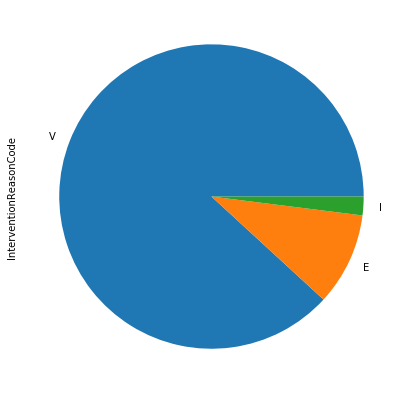

In [77]:
df_train["InterventionReasonCode"][df_train["InterventionReasonCode"]!="no"].value_counts().plot.pie(figsize=(7, 7))

In [78]:
df_train.groupby("InterventionReasonCode").apply(percentage_of_positives).sort_values(ascending=False)

InterventionReasonCode
I     4.518393
E     2.021915
V     0.954476
no    0.000000
dtype: float64

### ReportingOfficerIdentificationID

In [79]:
#This feature can be a source of bias

In [80]:
n_ReportingOfficerIdentificationID = df_train["ReportingOfficerIdentificationID"].value_counts()
n_ReportingOfficerIdentificationID

WCW0264        8183
790642042      7765
1051           7166
1000002598     5562
1000002029     5430
               ... 
PSC5613           1
10761             1
O034              1
21935/23750       1
738               1
Name: ReportingOfficerIdentificationID, Length: 8593, dtype: int64

In [81]:
n_ReportingOfficerIdentificationID.head()

WCW0264       8183
790642042     7765
1051          7166
1000002598    5562
1000002029    5430
Name: ReportingOfficerIdentificationID, dtype: int64

In [82]:
summary +=  "\nTop 5: " + str(n_ReportingOfficerIdentificationID.head()) + new_line
summary +=  "\nNumber unique values for ReportingOfficerIdentificationID: " + str(len(n_ReportingOfficerIdentificationID)) + new_line

### ResidentIndicator

In [83]:
n_ResidentIndicator = df_train["ResidentIndicator"].value_counts()
n_ResidentIndicator

True     1955377
False     313510
Name: ResidentIndicator, dtype: int64

In [84]:
summary +=  "\n" + str(n_ResidentIndicator) + new_line

In [85]:
df_train.groupby("ResidentIndicator").apply(percentage_of_positives).sort_values(ascending=False)

ResidentIndicator
True     1.191791
False    0.747026
dtype: float64

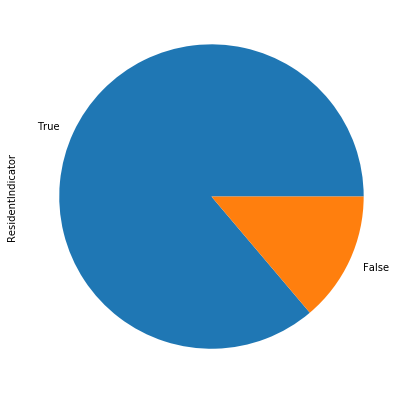

In [86]:
df_train["ResidentIndicator"].value_counts().plot.pie(figsize=(7, 7))

### TownResidentIndicator

In [87]:
n_TownResidentIndicator = df_train["TownResidentIndicator"].value_counts()

In [88]:
summary +=  "\n" + str(n_TownResidentIndicator) + new_line

In [89]:
df_train.groupby("TownResidentIndicator").apply(percentage_of_positives).sort_values(ascending=False)

TownResidentIndicator
True     1.373161
False    1.021568
dtype: float64

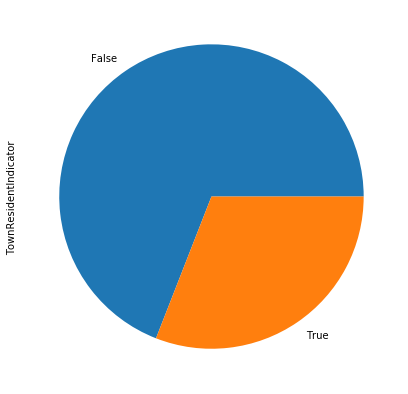

In [90]:
df_train["TownResidentIndicator"].value_counts().plot.pie(figsize=(7, 7))

### Age

In [91]:
age_describe = df_train["SubjectAge"].describe()
age_describe

count    2.268887e+06
mean     3.864314e+01
std      1.495402e+01
min      1.000000e+00
25%      2.600000e+01
50%      3.600000e+01
75%      5.000000e+01
max      9.900000e+01
Name: SubjectAge, dtype: float64

In [92]:
summary +=  "\n" + str(age_describe) + new_line

In [93]:
df_train["SubjectAge"] = df_train["SubjectAge"].astype(float)

In [94]:
min_age = min(df_train["SubjectAge"])
min_age

1.0

In [95]:
max_age = max(df_train["SubjectAge"])
max_age

99.0

Let's split ages in these ranges:    

Youth (<18)   

Young Adult (18 to 35)   

Adult (36 to 55)   

Senior (56 and up)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fb7f9151190>]],
      dtype=object)

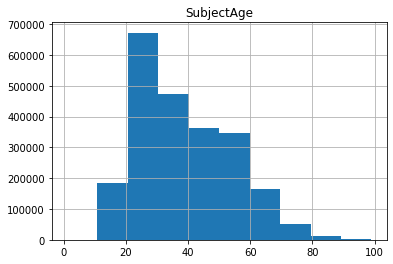

In [96]:
df_train.hist(column="SubjectAge")

In [97]:
def clean_age(value):
    if value < 18:
        return "Youth"
    elif value >= 18 and value <=35:
        return "Young Adult"
    elif value  >= 36 and value <=55:
        return "Adult"
    else:
        return "Senior"

In [98]:
df_train["SubjectAge"] = df_train["SubjectAge"].apply(clean_age)

### SearchAuthorizationCode

In [99]:
n_SearchAuthorizationCode = df_train["SearchAuthorizationCode"].value_counts()

In [100]:
summary +=  "\n" + str(n_SearchAuthorizationCode) + new_line

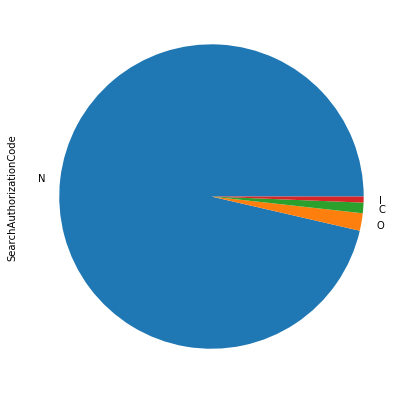

In [101]:
df_train["SearchAuthorizationCode"].value_counts().plot.pie(figsize=(7, 7))

In [102]:
df_train.groupby("SearchAuthorizationCode").apply(percentage_of_positives)

SearchAuthorizationCode
C    24.910104
I    11.693604
N     0.134890
O    34.895425
dtype: float64

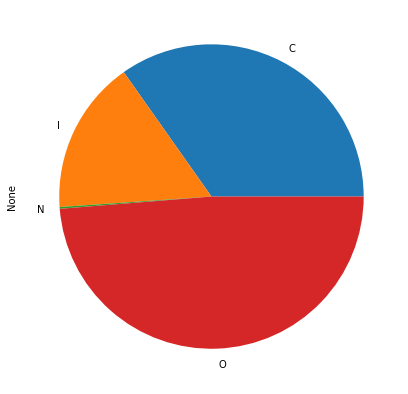

In [103]:
df_train.groupby("SearchAuthorizationCode").apply(percentage_of_positives).plot.pie(figsize=(7, 7))

In [104]:
df_train.groupby("SearchAuthorizationCode").apply(percentage_of_false_positives) #try encoding by 0 or 1

SearchAuthorizationCode
C    74.890202
I    88.115737
N    86.707435
O    46.870689
dtype: float64

### SubjectSexCode

In [105]:
n_SubjectSexCode = df_train["SubjectSexCode"].value_counts()

In [106]:
summary +=  "\n" + str(n_SubjectSexCode) + new_line

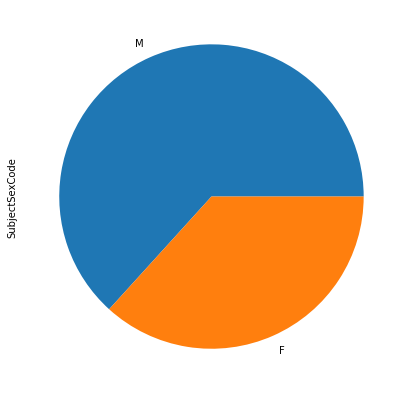

In [107]:
df_train["SubjectSexCode"].value_counts().plot.pie(figsize=(7, 7))

### SubjectRaceCode

In [108]:
n_SubjectRaceCode = df_train["SubjectRaceCode"].value_counts()
n_SubjectRaceCode

W    1856712
B     350133
A      44419
I      17623
Name: SubjectRaceCode, dtype: int64

In [109]:
summary +=  "\n" + str(n_SubjectRaceCode) + new_line

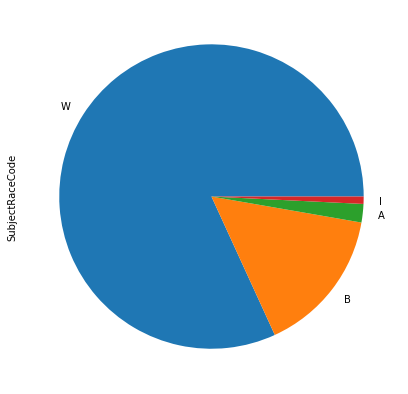

In [110]:
df_train["SubjectRaceCode"].value_counts().plot.pie(figsize=(7, 7))

### SubjectEthnicityCode

In [111]:
n_SubjectEthnicityCode = df_train["SubjectEthnicityCode"].value_counts()
n_SubjectEthnicityCode

N    1925881
H     297619
M      45387
Name: SubjectEthnicityCode, dtype: int64

In [112]:
summary +=  "\n" + str(n_SubjectEthnicityCode) + new_line

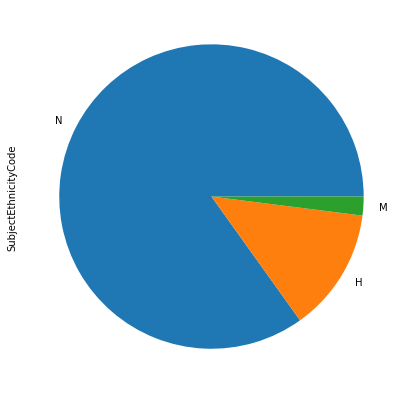

In [113]:
df_train["SubjectEthnicityCode"].value_counts().plot.pie(figsize=(7, 7))

In [114]:
file.write(summary)
file.close()

# Search for Bias

## SubjectRaceCode, SubjectEthnicityCode, SubjectSexCode, SubjectAge

In [115]:
def evaluate_bias(row):
    row_ = copy.copy(row)
    n_nulls = len(row[pd.isna(row)])
    len_row = len(row)
    n_not_nulls = len_row - n_nulls
    row_ = row_.dropna()
    if n_not_nulls > 1:
        return max(row_) - min(row_)
    else:
        return None  

In [116]:
def diffs(row):
    row_ = copy.copy(row)
    n_nulls = len(row[pd.isna(row)])
    len_row = len(row)
    n_not_nulls = len_row - n_nulls
    row_ = row_.dropna()
    array = row_.values
    if n_not_nulls > 1:
        diff = []
        for i in range(0, len(array)-1):
            for j in range(i+1, len(array)):
                diff.append(abs(array[i]-array[j]))
        return diff
    else:
        return None  

In [117]:
def evaluate_bias_by_group(group, threshold=100):
    police_src = df_train.groupby(by=group).apply(lambda x: precision(x, threshold))
    result = police_src.unstack(level=[1,2,3,4])
    result["Max Diff"] = result.apply(evaluate_bias, axis=1)
    result = result.sort_values(by="Max Diff", ascending=False)
    result["Diff"] = result.drop(columns="Max Diff").apply(diffs, axis=1)
    result = result[(pd.isna(result["Max Diff"])!=True)]
    return result

### By Department Name

In [118]:
#number of occurenceis of each protected group
pg_counts = df_train.groupby(by=["Department Name","SubjectRaceCode", "SubjectEthnicityCode", "SubjectAge","SubjectSexCode"]).count().VehicleSearchedIndicator
pg_counts

Department Name  SubjectRaceCode  SubjectEthnicityCode  SubjectAge   SubjectSexCode
ansonia          A                H                     Adult        F                   5
                                                                     M                   6
                                                        Senior       M                   2
                                                        Young Adult  F                   6
                                                                     M                   4
                                                                                      ... 
yale             W                N                     Senior       M                 192
                                                        Young Adult  F                 309
                                                                     M                 515
                                                        Youth        F                   7
      

In [149]:
len(pg_counts[pg_counts>=100]), len(pg_counts[pg_counts<100])

(1772, 4686)

In [120]:
pg_counts.mean(), pg_counts.std(), pg_counts.median()

(351.32966862805824, 1577.1017454864568, 16.0)

In [121]:
dn_bias_analysis = evaluate_bias_by_group(group=["Department Name","SubjectRaceCode", "SubjectEthnicityCode", "SubjectAge","SubjectSexCode"], threshold=100)

/home/ines/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:3946: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  new_axis = axis.drop(labels, errors=errors)


In [122]:
dn_bias_analysis

SubjectRaceCode          A                                          \
SubjectEthnicityCode     H                                M          
SubjectAge           Adult     Senior Young Adult     Adult Senior   
SubjectSexCode           F   M      M           F   M     M      M   
Department Name                                                      
wallingford            NaN NaN    NaN         NaN NaN   NaN    NaN   
state                  NaN NaN    NaN         NaN NaN   NaN    NaN   
vernon                 NaN NaN    NaN         NaN NaN   NaN    NaN   
glastonbury            NaN NaN    NaN         NaN NaN   NaN    NaN   
waterbury              NaN NaN    NaN         NaN NaN   NaN    NaN   
wilton                 NaN NaN    NaN         NaN NaN   NaN    NaN   
csptroopg              NaN NaN    NaN         NaN NaN   NaN    NaN   
norwich                NaN NaN    NaN         NaN NaN   NaN    NaN   
csptroopc              NaN NaN    NaN         NaN NaN   NaN    NaN   
csptroope              NaN NaN    NaN         NaN NaN   NaN    NaN   
csptroopa              NaN NaN    NaN         NaN NaN   NaN    NaN   
westhartford           NaN NaN    NaN         NaN NaN   NaN    NaN   
enfield                NaN NaN    NaN         NaN NaN   NaN    NaN   
danbury                NaN NaN    NaN         NaN NaN   NaN    NaN   
newbritain             NaN NaN    NaN         NaN NaN   NaN    NaN   
westhaven              NaN NaN    NaN         NaN NaN   NaN    NaN   
berlin                 NaN NaN    NaN         NaN NaN   NaN    NaN   
willimantic            NaN NaN    NaN         NaN NaN   NaN    NaN   
westport               NaN NaN    NaN         NaN NaN   NaN    NaN   
easthartford           NaN NaN    NaN         NaN NaN   NaN    NaN   
trumbull               NaN NaN    NaN         NaN NaN   NaN    NaN   
csptrooph              NaN NaN    NaN         NaN NaN   NaN    NaN   
norwalk                NaN NaN    NaN         NaN NaN   NaN    NaN   
plainville             NaN NaN    NaN         NaN NaN   NaN    NaN   
wethersfield           NaN NaN    NaN         NaN NaN   NaN    NaN   
stamford               NaN NaN    NaN         NaN NaN   NaN    NaN   
bridgeport             NaN NaN    NaN         NaN NaN   NaN    NaN   
manchester             NaN NaN    NaN         NaN NaN   NaN    NaN   
stratford              NaN NaN    NaN         NaN NaN   NaN    NaN   
newhaven               NaN NaN    NaN         NaN NaN   NaN    NaN   
fairfield              NaN NaN    NaN         NaN NaN   NaN    NaN   
milford                NaN NaN    NaN         NaN NaN   NaN    NaN   
derby                  NaN NaN    NaN         NaN NaN   NaN    NaN   
greenwich              NaN NaN    NaN         NaN NaN   NaN    NaN   
newington              NaN NaN    NaN         NaN NaN   NaN    NaN   
hartford               NaN NaN    NaN         NaN NaN   NaN    NaN   
middletown             NaN NaN    NaN         NaN NaN   NaN    NaN   

SubjectRaceCode                             ...               I            A  \
SubjectEthnicityCode                 N      ...     H         H            M   
SubjectAge           Young Adult Adult      ... Youth     Youth Senior Youth   
SubjectSexCode                 F     F   M  ...     M   F     F      F     M   
Department Name                             ...                                
wallingford                  NaN   NaN NaN  ...   NaN NaN   NaN    NaN   NaN   
state                        NaN   NaN NaN  ...   NaN NaN   NaN    NaN   NaN   
vernon                       NaN   NaN NaN  ...   NaN NaN   NaN    NaN   NaN   
glastonbury                  NaN   NaN NaN  ...   NaN NaN   NaN    NaN   NaN   
waterbury                    NaN   NaN NaN  ...   NaN NaN   NaN    NaN   NaN   
wilton                       NaN   NaN NaN  ...   NaN NaN   NaN    NaN   NaN   
csptroopg                    NaN   NaN NaN  ...   NaN NaN   NaN    NaN   NaN   
norwich                      NaN   NaN NaN  ...   NaN NaN   NaN    NaN   NaN   
csptroopc          

In [123]:
series_mean = dn_bias_analysis.mean()
series_mean

SubjectRaceCode  SubjectEthnicityCode  SubjectAge   SubjectSexCode
A                H                     Adult        F                       NaN
                                                    M                       NaN
                                       Senior       M                       NaN
                                       Young Adult  F                       NaN
                                                    M                       NaN
                                                                        ...    
                 M                     Youth        M                       NaN
                                                    F                       NaN
I                M                     Youth        M                       NaN
                                                    F                       NaN
Max Diff                                                              12.046065
Length: 97, dtype: float64

In [124]:
#Protected group with highest precision on average
series_mean[series_mean==series_mean.max()]

SubjectRaceCode  SubjectEthnicityCode  SubjectAge   SubjectSexCode
W                N                     Young Adult  F                 45.461068
dtype: float64

In [125]:
#Protected group with lowest precision on average
series_mean[series_mean==series_mean.min()]

SubjectRaceCode  SubjectEthnicityCode  SubjectAge   SubjectSexCode
W                H                     Young Adult  F                 4.310345
dtype: float64

In [126]:
dn_bias_analysis = dn_bias_analysis.dropna(how="all", axis=1)

In [127]:
#Department Name with Highest amplitude for precision between protected groups
dn_bias_analysis[dn_bias_analysis["Max Diff"]==dn_bias_analysis["Max Diff"].max()]["Max Diff"]

Department Name
wallingford    34.426947
Name: Max Diff, dtype: float64

In [128]:
#Department Name with lowest amplitude for precision between protected groups
dn_bias_analysis[dn_bias_analysis["Max Diff"]==dn_bias_analysis["Max Diff"].min()]["Max Diff"]

Department Name
middletown    0.462278
Name: Max Diff, dtype: float64

In [129]:
#Department Names with amplitude bigger then 5
dn_bias_analysis[dn_bias_analysis["Max Diff"]>5].index, len(dn_bias_analysis[dn_bias_analysis["Max Diff"]>5].index)

(Index(['wallingford', 'state', 'vernon', 'glastonbury', 'waterbury', 'wilton',
        'csptroopg', 'norwich', 'csptroopc', 'csptroope', 'csptroopa',
        'westhartford', 'enfield', 'danbury', 'newbritain', 'westhaven',
        'berlin', 'willimantic', 'westport', 'easthartford', 'trumbull',
        'csptrooph', 'norwalk', 'plainville', 'wethersfield', 'stamford',
        'bridgeport', 'manchester', 'stratford', 'newhaven'],
       dtype='object', name='Department Name'), 30)

In [130]:
dn_bias_analysis_diff_array = [item for sublist in dn_bias_analysis["Diff"].values for item in sublist]

Text(0, 0.5, 'Count')

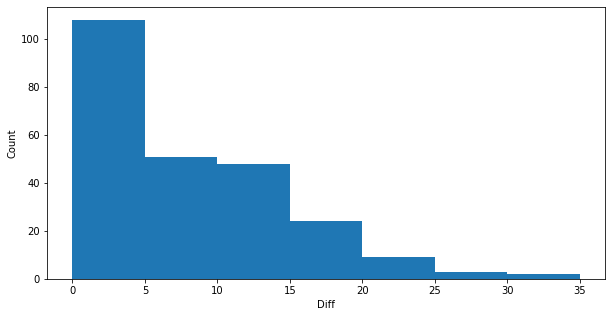

In [131]:
#histogram of differences between precisions of protected groups
plt.figure(figsize=(10,5))
plt.hist(dn_bias_analysis_diff_array, range=(0,35), density=False, bins=7)
plt.xlabel("Diff")
plt.ylabel("Count")

In [132]:
np.mean(dn_bias_analysis_diff_array), np.std(dn_bias_analysis_diff_array)

(8.086219754156723, 6.680598743453754)

### By SearchAuthorizationCode

In [133]:
sac_bias_analysis = evaluate_bias_by_group(group=["SearchAuthorizationCode","SubjectRaceCode", "SubjectEthnicityCode", "SubjectAge","SubjectSexCode"], threshold=100)

In [134]:
sac_bias_analysis = sac_bias_analysis.dropna(how="all", axis=1)

In [135]:
#SearchAuthorizationCode with Highest amplitude for precision between protected groups
sac_bias_analysis[sac_bias_analysis["Max Diff"]==sac_bias_analysis["Max Diff"].max()]["Max Diff"]

SearchAuthorizationCode
O    33.749562
Name: Max Diff, dtype: float64

In [136]:
#SearchAuthorizationCode with lowest amplitude for precision between protected groups
sac_bias_analysis[sac_bias_analysis["Max Diff"]==sac_bias_analysis["Max Diff"].min()]["Max Diff"]

SearchAuthorizationCode
I    14.894221
Name: Max Diff, dtype: float64

In [137]:
sac_bias_analysis_diff_array = [item for sublist in sac_bias_analysis["Diff"].values for item in sublist]

Text(0, 0.5, 'Count')

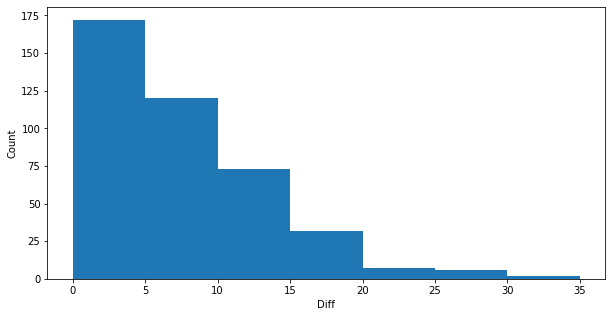

In [138]:
#histogram of differences between precisions of protected groups
plt.figure(figsize=(10,5))
plt.hist(sac_bias_analysis_diff_array, range=(0,35), density=False, bins=7)
plt.xlabel("Diff")
plt.ylabel("Count")

### ReportingOfficerIdentificationID

In [139]:
roi_bias_analysis = evaluate_bias_by_group(group=["ReportingOfficerIdentificationID","SubjectRaceCode", "SubjectEthnicityCode", "SubjectAge","SubjectSexCode"], threshold=25)

In [140]:
roi_bias_analysis = roi_bias_analysis.dropna(how="all", axis=1)

In [141]:
roi_bias_analysis_diff_array = [item for sublist in roi_bias_analysis["Diff"].values for item in sublist]

Text(0, 0.5, 'Count')

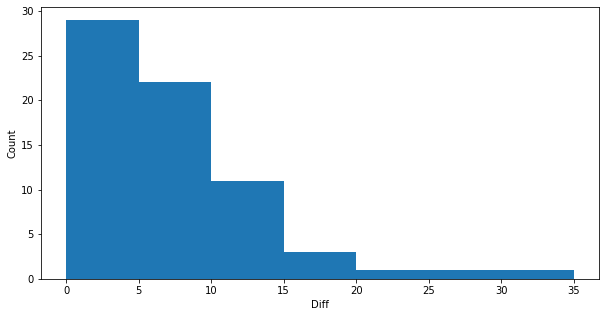

In [142]:
#histogram of differences between precisions of protected groups
plt.figure(figsize=(10,5))
plt.hist(roi_bias_analysis_diff_array, range=(0,35), density=False, bins=7)
plt.xlabel("Diff")
plt.ylabel("Count")

In [143]:
#Department Names with amplitude bigger then 5
roi_bias_analysis[roi_bias_analysis["Max Diff"]>5].index, len(roi_bias_analysis[roi_bias_analysis["Max Diff"]>5].index)

(Index(['1000003196', '1000002101', '199', '10', '100000230', '596',
        '1000002072', '790642042', '1000002164', 'JMK0326', '30233',
        '1000002585', '625', 'KKC0268', 'SEM0240', '179', '256', '49', '1016',
        '6507', '1000002747', '1000002608', '1083'],
       dtype='object', name='ReportingOfficerIdentificationID'), 23)

# Contraband Indicatores Analysis

In [144]:
df_train_cleaned = pd.read_csv("resources/df_cleaned.csv", index_col=0)

/home/ines/anaconda3/lib/python3.7/site-packages/numpy/lib/arraysetops.py:568: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


In [145]:
df_train_cleaned.head()

,InterventionLocationName,InterventionReasonCode,ResidentIndicator,SearchAuthorizationCode,StatuteReason,TownResidentIndicator,sin_month,cos_month,sin_weekday,cos_weekday,sin_hour,cos_hour,ContrabandIndicator
0,0.02,0.01,1,0,0.01,1,-0.866025,0.5,0.781831,0.62349,0.0,1.0,False
1,0.01,0.01,0,0,0.03,0,-0.866025,0.5,0.781831,0.62349,0.0,1.0,False
2,0.01,0.01,1,0,0.00,1,-0.866025,0.5,0.781831,0.62349,0.0,1.0,False
3,0.01,0.01,1,0,0.00,0,-0.866025,0.5,0.781831,0.62349,0.0,1.0,False
4,0.01,0.01,1,0,0.00,0,-0.866025,0.5,0.781831,0.62349,0.0,1.0,False


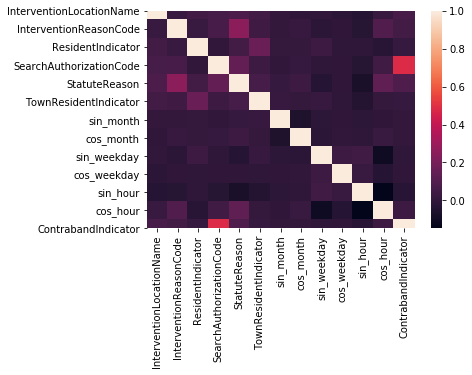

In [146]:
corrMatrix = df_train_cleaned.corr()
sn.heatmap(corrMatrix)

In [147]:
ci_corr = abs(corrMatrix.ContrabandIndicator)
ci_corr

InterventionLocationName    0.068844
InterventionReasonCode      0.054430
ResidentIndicator           0.014519
SearchAuthorizationCode     0.486566
StatuteReason               0.087072
TownResidentIndicator       0.015373
sin_month                   0.007650
cos_month                   0.008301
sin_weekday                 0.008502
cos_weekday                 0.002794
sin_hour                    0.023463
cos_hour                    0.039338
ContrabandIndicator         1.000000
Name: ContrabandIndicator, dtype: float64

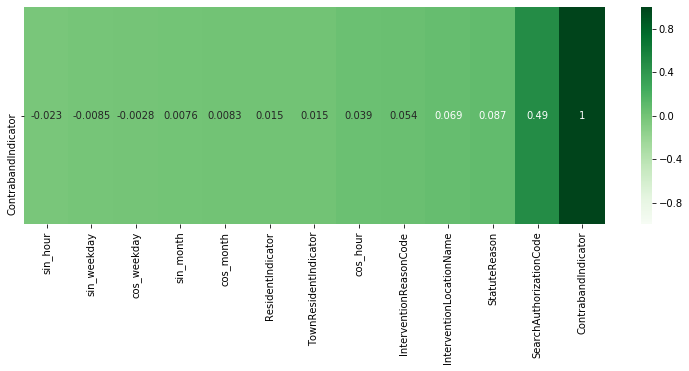

In [148]:
plt.figure(figsize=(13,4))
sn.heatmap(corrMatrix[['ContrabandIndicator']].sort_values(by=['ContrabandIndicator'], ascending=True).T,
            vmin=-1,
            cmap='Greens',
            annot=True);
plt.show()